In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

## a) Dựa trên hàm median_filter ở mục 4.1, viết hàm mean_filter.

In [75]:
def median_filter(data, kernel_size):
    temp=[]
    kernel_halfsize = kernel_size // 2 # Chia lấy phần nguyên
    data_final = np.zeros((len(data),len(data[0]))) # Tạo ma trận zero
    for i in range(len(data)): # Height
        for j in range(len(data[0])): # Width
            for z in range(kernel_size):
                if (i + z - kernel_halfsize < 0) or (i + z - kernel_halfsize > len(data) - 1): # Thêm 0 biên trên/dưới
                    for c in range(kernel_size):
                        temp.append(0)
                else: # Thêm 0 vào biên trái/phải
                    if (j + z - kernel_halfsize < 0) or (j + kernel_halfsize > len(data[0]) - 1):
                         temp.append(0)
                    else: # Thêm giá trị lân cận vào temp
                         for k in range(kernel_halfsize):
                             temp.append(data[i + z - kernel_halfsize][j + k - kernel_halfsize])
            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [76]:

def mean_filter(data, kernel_size):
    kernel_halfsize = kernel_size // 2
    data_final = np.zeros((len(data), len(data[0])))

    for i in range(len(data)):
        for j in range(len(data[0])):
            temp = []
            for z in range(-kernel_halfsize, kernel_halfsize + 1):
                for k in range(-kernel_halfsize, kernel_halfsize + 1):
                    x, y = i + z, j + k
                    if 0 <= x < len(data) and 0 <= y < len(data[0]):
                        temp.append(data[x][y])
                    else:
                        temp.append(0)  # Thêm 0 cho biên ngoài
            data_final[i][j] = np.mean(temp)
    return data_final


## b) Thêm nhiễu Gaussian vào hình lena.jpg

In [77]:
img = cv2.imread('Lena.jpg', cv2.IMREAD_GRAYSCALE)

# Thêm nhiễu Gaussian
mean = 0
std_dev = 25  # Độ lệch chuẩn của nhiễu
noise = np.random.normal(mean, std_dev, img.shape)
noisy_img = img + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

Text(0.5, 1.0, 'lena noise')

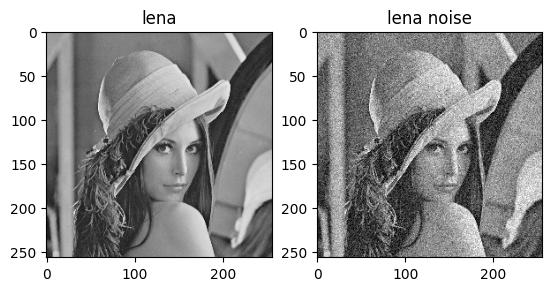

In [78]:
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("lena")
plt.subplot(122)
plt.imshow(noisy_img,cmap="gray")
plt.title("lena noise")

## c) Sử dụng mean_filter và median_filter với kernel 3x3, 5x5, và 7x7

In [79]:

mean_filtered_3x3 = mean_filter(noisy_img, 3)
mean_filtered_5x5 = mean_filter(noisy_img, 5)
mean_filtered_7x7 = mean_filter(noisy_img, 7)

median_filtered_3x3 = median_filter(noisy_img, 3)
median_filtered_5x5 = median_filter(noisy_img, 5)
median_filtered_7x7 = median_filter(noisy_img, 7)


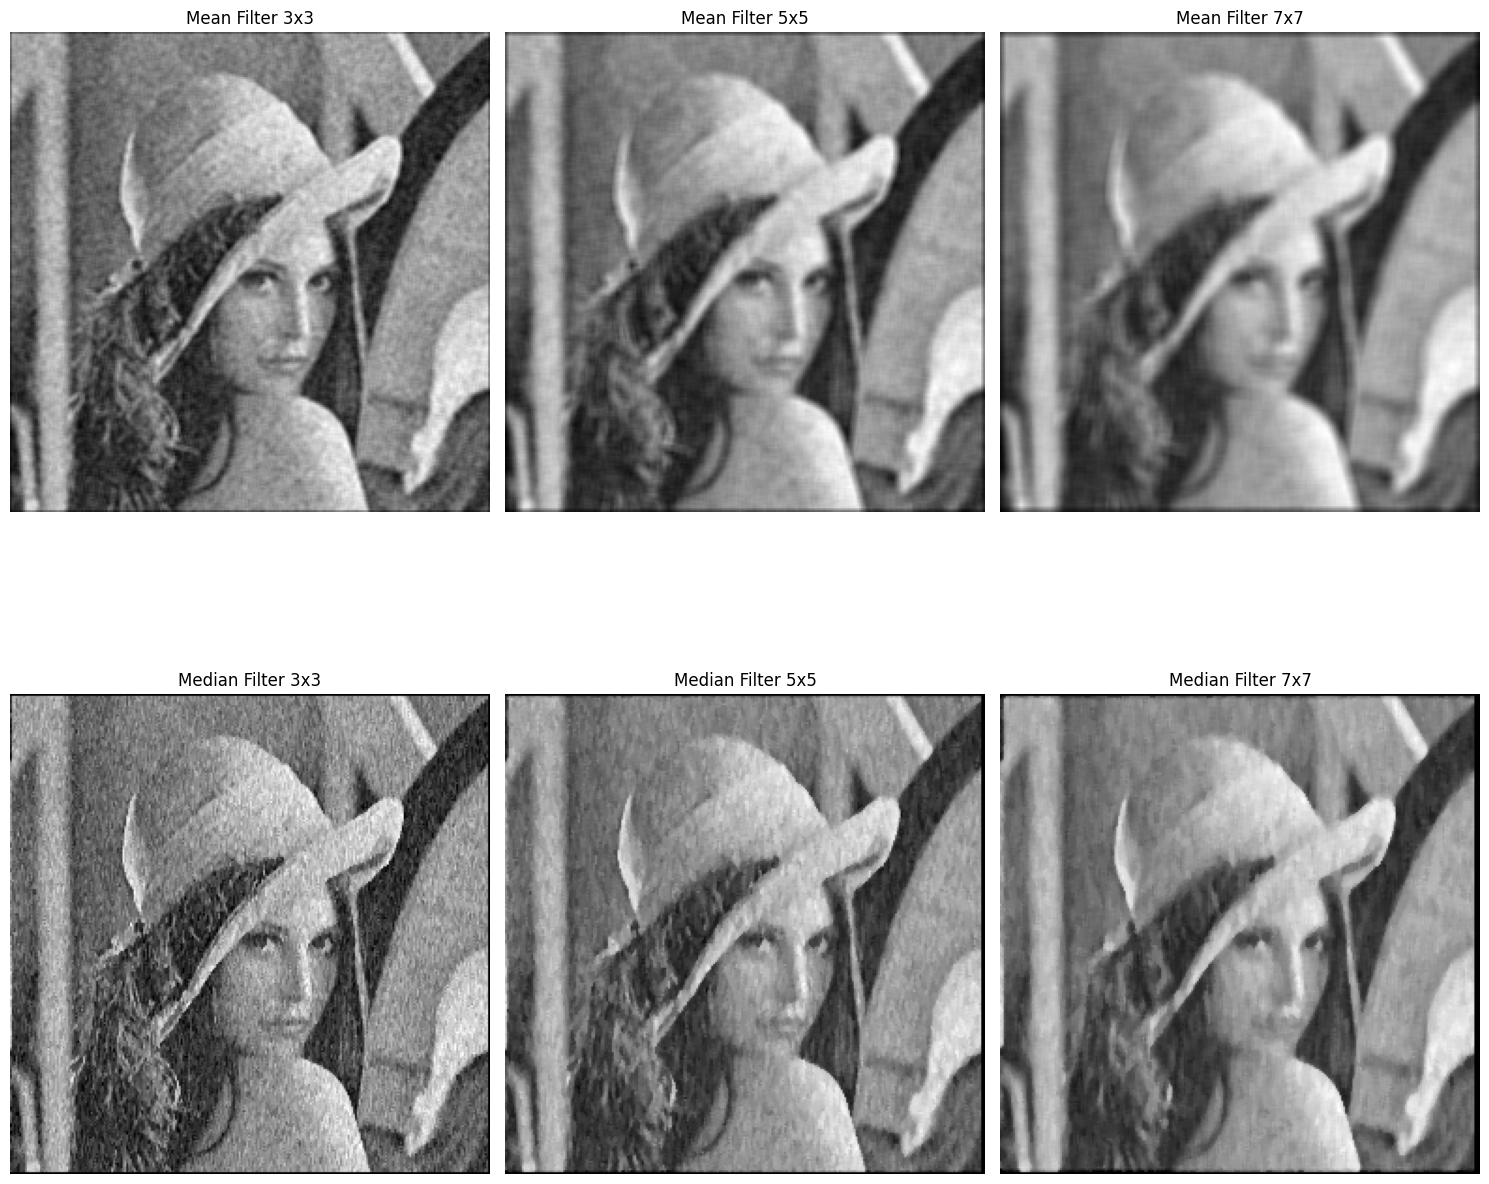

In [85]:

# Hiển thị các ảnh đã lọc
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Ảnh với mean_filter
axes[0, 0].imshow(mean_filtered_3x3, cmap='gray')
axes[0, 0].set_title('Mean Filter 3x3')
axes[0, 1].imshow(mean_filtered_5x5, cmap='gray')
axes[0, 1].set_title('Mean Filter 5x5')
axes[0, 2].imshow(mean_filtered_7x7, cmap='gray')
axes[0, 2].set_title('Mean Filter 7x7')

# Ảnh với median_filter
axes[1, 0].imshow(median_filtered_3x3, cmap='gray')
axes[1, 0].set_title('Median Filter 3x3')
axes[1, 1].imshow(median_filtered_5x5, cmap='gray')
axes[1, 1].set_title('Median Filter 5x5')
axes[1, 2].imshow(median_filtered_7x7, cmap='gray')
axes[1, 2].set_title('Median Filter 7x7')


# Tắt trục tọa độ
for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


In [86]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
# Tính PSNR và SSIM cho mean_filter với data_range=255
psnr_mean_3x3 = psnr(img, mean_filtered_3x3, data_range=255)
ssim_mean_3x3 = ssim(img, mean_filtered_3x3, data_range=255)

psnr_mean_5x5 = psnr(img, mean_filtered_5x5, data_range=255)
ssim_mean_5x5 = ssim(img, mean_filtered_5x5, data_range=255)

psnr_mean_7x7 = psnr(img, mean_filtered_7x7, data_range=255)
ssim_mean_7x7 = ssim(img, mean_filtered_7x7, data_range=255)

# Tính PSNR và SSIM cho median_filter với data_range=255
psnr_median_3x3 = psnr(img, median_filtered_3x3, data_range=255)
ssim_median_3x3 = ssim(img, median_filtered_3x3, data_range=255)

psnr_median_5x5 = psnr(img, median_filtered_5x5, data_range=255)
ssim_median_5x5 = ssim(img, median_filtered_5x5, data_range=255)

psnr_median_7x7 = psnr(img, median_filtered_7x7, data_range=255)
ssim_median_7x7 = ssim(img, median_filtered_7x7, data_range=255)



In [87]:
# In các giá trị PSNR và SSIM cho mean_filter
print("Mean Filter:")
print(f"Kernel 3x3 - PSNR: {psnr_mean_3x3:.2f}, SSIM: {ssim_mean_3x3:.4f}")
print(f"Kernel 5x5 - PSNR: {psnr_mean_5x5:.2f}, SSIM: {ssim_mean_5x5:.4f}")
print(f"Kernel 7x7 - PSNR: {psnr_mean_7x7:.2f}, SSIM: {ssim_mean_7x7:.4f}")

# In các giá trị PSNR và SSIM cho median_filter
print("\nMedian Filter:")
print(f"Kernel 3x3 - PSNR: {psnr_median_3x3:.2f}, SSIM: {ssim_median_3x3:.4f}")
print(f"Kernel 5x5 - PSNR: {psnr_median_5x5:.2f}, SSIM: {ssim_median_5x5:.4f}")
print(f"Kernel 7x7 - PSNR: {psnr_median_7x7:.2f}, SSIM: {ssim_median_7x7:.4f}")


Mean Filter:
Kernel 3x3 - PSNR: 24.57, SSIM: 0.6536
Kernel 5x5 - PSNR: 23.37, SSIM: 0.6708
Kernel 7x7 - PSNR: 22.22, SSIM: 0.6320

Median Filter:
Kernel 3x3 - PSNR: 18.58, SSIM: 0.3593
Kernel 5x5 - PSNR: 18.51, SSIM: 0.4384
Kernel 7x7 - PSNR: 17.88, SSIM: 0.4635


## nhận xét :
Mean Filter: Với kernel 3x3, PSNR cao nhất và SSIM tương đối cao, cho thấy mức độ khử nhiễu tốt mà vẫn giữ lại chi tiết. Khi tăng kích thước kernel (5x5, 7x7), PSNR giảm và SSIM có biến động nhẹ. Điều này cho thấy mean filter với kernel lớn làm mờ ảnh nhiều hơn, giảm nhiễu nhưng làm mất một số chi tiết quan trọng.

Median Filter: PSNR và SSIM đều thấp hơn đáng kể so với mean filter, cho thấy khả năng giữ lại chi tiết của median filter kém hơn trong trường hợp nhiễu Gaussian. Tuy nhiên, SSIM tăng nhẹ với kernel lớn hơn, cho thấy cấu trúc được bảo toàn tốt hơn khi nhiễu giảm, nhưng độ chi tiết tổng thể vẫn bị ảnh hưởng.